<img src = "../imgs/Banner_Logo.jpeg"/>

# Histogram Processing

In this lecture, we are going to check some arithmetic operations over images and how do they affect the shape of histograms.

we are going to make an introduction to the following methods:

+ Negative images
+ Gamma Correction over images.
+ Contrast Stretching/Normalization

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, interact_manual, fixed
import ipywidgets as widgets

## Negative images

A negative image basically finds the "inversion" or complement of an image.

You can find the negative of a given image just applying the following expression:

$$I_{negative} = 255 - I_{original}$$

<img src = "../imgs/negative.png">

In [19]:
def read_image(path):
    image = cv.imread(path,0) # <==== Read as grayscale image
    return image
def negative_image(image):
    neg_image = 255 - image
    return neg_image


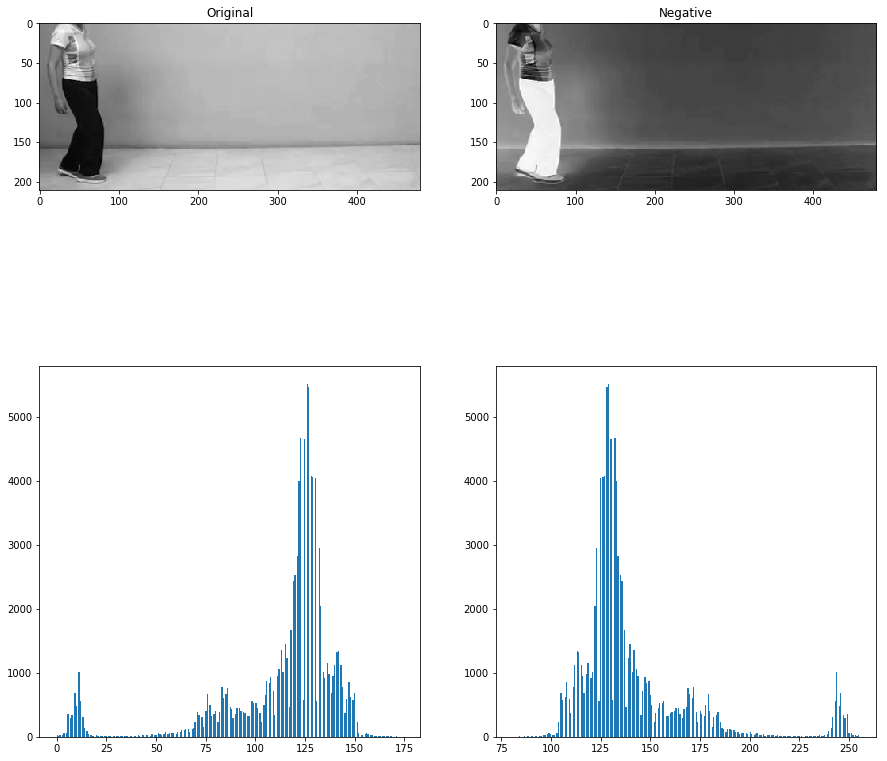

In [3]:
path = 'frames/gait/1.jpg'
image = read_image(path)
neg_image = negative_image(image)
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(image,'gray'), plt.title('Original') 
plt.subplot(222), plt.imshow(neg_image,'gray'), plt.title('Negative') 
plt.subplot(223), plt.hist(image.ravel(),256)
plt.subplot(224), plt.hist(neg_image.ravel(),256)
print("")

# Gamma Correction

The gamma correction is a method that allow us to make our images darker or brighter depending on our needings.

You can apply a Gamma correction to any image following the expression:

$$ I_{gamma} =  (255^{1-\gamma})(I^{\gamma})$$

notice how your image becomes darker if $\gamma > 1$ and how the image becomes brighter if $0 < \gamma < 1$

<img src = "../imgs/gamma.PNG">
<img src = "../imgs/gamma2.PNG">

In [20]:
def gamma_correction(g, image):
    Ig = (255**(1-g))*(image.astype(np.float64)**g)
    Ig = Ig.astype(np.uint8)

    plt.figure(figsize=(13,18))
    plt.subplot(221), plt.imshow(image,'gray'), plt.title('Original') 
    plt.subplot(222), plt.imshow(Ig,'gray'), plt.title(r'$\gamma = {}$'.format(g)) 
    plt.figure(figsize=(10,15))
    plt.subplot(223), plt.hist(image.ravel(),256), plt.grid(True) 
    plt.subplot(224), plt.hist(Ig.ravel(),256), plt.grid(True);


In [21]:
interact_manual(gamma_correction, image = fixed(image), g = (0.0,10.0, 0.01))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUuMCwgZGVzY3JpcHRpb249dSdnJywgbWF4PTEwLjAsIHN0ZXA9MC4wMSksIEJ1dHRvbihkZXNjcmlwdGlvbj11J1J1biDigKY=


<function __main__.gamma_correction>

# Contrast stretching
Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values, e.g. the the full range of pixel values that the image type concerned allows.

You can apply this method following the expression:

$$I_{N} = (\frac{255}{I_{max} - I_{min}})(I - I_{min})$$

In [22]:
 def normalization(image):
    Imin = np.amin(image)
    Imax = np.amax(image)
    Is = (255/(Imax-Imin))*(image.astype(np.float64) - Imin)
    Is = Is.astype(np.uint8)

    plt.figure(figsize=(15,15))
    plt.subplot(221), plt.imshow(image,'gray',vmin=0, vmax=255), plt.title('Original') 
    plt.subplot(222), plt.imshow(Is,'gray',vmin=0, vmax=255), plt.title('Enhanced Contrast') 
    plt.subplot(223), plt.hist(image.ravel(),256), plt.axis([0,255,0,6e3]), plt.grid(True) 
    plt.subplot(224), plt.hist(Is.ravel(),256), plt.axis([0,255,0,6e3]), plt.grid(True);

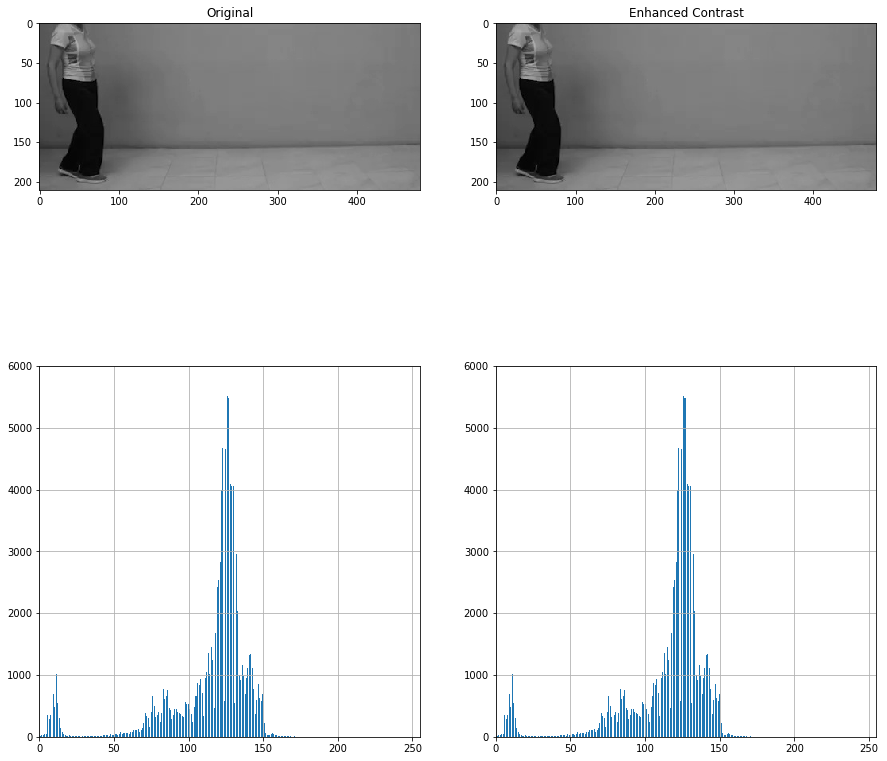

In [23]:
normalization(image)

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">